#  Analisis Data Multidimensi berdasarkan Time Domain Feature dan Frequency Domain Feature
### Oleh: Muhammad Rosyid Suseno

##1 Deskripsi Permasalahan
Dua jenis zat (A dan B) masing-masing diambil 35 sampel, sehingga total ada 70 sampel. Setiap sampel dimasukkan ke ruang DataLoger yang dilengkapi 10 sensor gas (F). Respon tiap
sensor (mV) diukur setiap 0.1 s selama hingga 30 s. Data hasil pengukuran diberikan pada
Data_crop1030.zip

##2. Tujuan Projek
Analisis Data Multidimensi

## 3. Metode

1. Fitur Gradien Terbesar. <br>
a. Untuk setiap respon sensor hitunglah gradien terbesar (gradmax).
b. Simpan nilai gradmax tiap sampel pada tabel, kemudian beri label A atau B pada kolom akhir sesuai jenis zat. Sehingga diperoleh tabel ukuran 70x11. Simpan data dengan nama gradmax.csv <br>
c. Berikan analisa terhadap data (menjawab apakah dari gradmax kedua zat bisa
terbedakan?) <br>
2. Fitur Koefisien Fourier Terbesar. <br>
a. Ulangi pekerjaan soal no. 1 tetapi menggunakan FFT. Hitung nilai FFT terbesar
untuk masing-masing respon sensor, kemudian beri label A atau B pada kolom
akhir sesuai jenis zat. Sehingga diperoleh tabel ukuran 70x11. Simpan data dengan nama fouriermax.csv <br>
b. Berikan analisa terhadap data (menjawab apakah dari fouriermax kedua zat bisa
terbedakan?) <br>


## 4. Hasil Eksperimen

### Import library

In [2]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

#### Read data from zip file

In [4]:
# https://drive.google.com/drive/folders/18AeTy7qTjWBnILkeBgnF2YoYfdG8zu3L?usp=drive_link
#Code berikut dibuat untuk membaca 70 dataset dengan lebih efisien

import zipfile
zip_file_name = "Data_crop1030.zip"

dataframes = []

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    for i in range(1, 71):
        file_type = "_A_" if i <= 35 else "_B_"
        if i <= 35:
            file_index = i
        else:
            file_index = i - 35

        file_name = f"{file_type}{file_index}_crop1030.csv"
        with zip_ref.open(file_name) as file:
            df = pd.read_csv(file)
        dataframes.append(df)

df_names = [f"df{i}" for i in range(1, 71)]
dfs_dict = dict(zip(df_names, dataframes))

for i in range(1, 71):
    df_name = f"df{i}"
    if df_name in dfs_dict:
        globals()[df_name] = dfs_dict[df_name]
    else:
        print(f"{df_name} tidak ditemukan dalam dfs_dict.")

#### Check Data

In [5]:
df70

,time(s),F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
0,10.0,3.10375,0.5025,0.21625,11.9775,-0.44375,-0.8175,-0.11125,12.37375,7.12,7.55125
1,10.1,3.22875,0.5025,0.21625,12.1025,-0.44375,-0.9425,-0.23625,12.49875,7.12,7.55125
2,10.2,3.22875,0.5025,0.34125,12.2275,-0.56875,-1.1925,-0.23625,12.62375,7.12,7.55125
3,10.3,3.22875,0.5025,0.21625,12.3525,-0.56875,-1.4425,-0.36125,12.74875,7.12,7.55125
4,10.4,3.22875,0.5025,0.21625,12.4775,-0.69375,-1.5675,-0.61125,12.87375,7.12,7.80125
...,...,...,...,...,...,...,...,...,...,...,...
196,29.6,1362.85375,224.2525,5.21625,1516.1025,767.55625,473.3075,12.13875,2401.49875,1642.12,2148.67625
197,29.7,1361.47875,224.8775,5.34125,1513.4775,763.68125,471.1825,11.88875,2400.24875,1640.87,2146.92625
198,29.8,1360.22875,225.3775,5.34125,1510.8525,759.55625,468.8075,12.26375,2398.87375,1639.62,2145.17625
199,29.9,1358.85375,225.8775,5.34125,1508.3525,755.68125,466.5575,12.13875,2397.49875,1638.37,2143.42625


In [6]:
df1

,time(s),F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
0,10.0,3.60875,0.4675,-0.285,12.04625,-2.2625,-1.345,0.040,12.98625,5.6125,6.46375
1,10.1,3.60875,0.4675,-0.410,11.92125,-2.3875,-1.345,0.040,12.98625,5.7375,6.58875
2,10.2,3.60875,0.4675,-0.410,11.92125,-2.3875,-1.470,0.040,12.98625,5.8625,6.58875
3,10.3,3.73375,0.4675,-0.535,11.79625,-2.5125,-1.470,0.165,12.86125,6.1125,6.71375
4,10.4,3.73375,0.5925,-0.660,11.67125,-2.5125,-1.470,-0.085,12.86125,6.2375,6.83875
...,...,...,...,...,...,...,...,...,...,...,...
196,29.6,1272.60875,169.2175,3.590,1408.79625,555.6125,399.530,19.415,2258.11125,1690.3625,2055.83875
197,29.7,1271.10875,169.4675,3.715,1405.04625,551.2375,397.030,19.540,2255.73625,1688.4875,2052.33875
198,29.8,1269.48375,169.7175,3.715,1401.17125,546.9875,394.655,19.415,2253.23625,1686.4875,2048.71375
199,29.9,1267.85875,170.0925,3.715,1397.29625,542.7375,392.155,19.540,2250.73625,1684.6125,2045.21375


In [7]:
df36

,time(s),F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
0,10.0,2.01125,0.84625,-0.0475,-1.12625,-4.8775,-4.585,-0.24125,0.35375,-0.94625,-4.685
1,10.1,2.01125,0.97125,-0.0475,-1.25125,-5.0025,-4.710,-0.24125,0.22875,-0.82125,-4.685
2,10.2,2.01125,0.97125,-0.1725,-1.50125,-5.1275,-4.835,-0.11625,0.22875,-0.69625,-4.560
3,10.3,2.01125,0.97125,-0.1725,-1.75125,-5.1275,-4.835,-0.11625,0.10375,-0.57125,-4.560
4,10.4,2.13625,1.09625,-0.2975,-2.00125,-5.2525,-4.960,0.00875,-0.02125,-0.44625,-4.435
...,...,...,...,...,...,...,...,...,...,...,...
196,29.6,1434.63625,273.84625,6.4525,1555.49875,764.1225,490.665,27.38375,2456.47875,1775.30375,2192.565
197,29.7,1432.88625,274.47125,6.4525,1552.12375,758.9975,487.915,27.25875,2454.60375,1773.55375,2189.940
198,29.8,1431.13625,274.97125,6.4525,1548.87375,753.9975,485.040,27.25875,2452.85375,1771.92875,2187.440
199,29.9,1429.26125,275.34625,6.5775,1545.49875,748.7475,482.290,27.25875,2450.97875,1770.30375,2184.815


In [9]:
df34

,time(s),F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
0,10.0,1.1225,0.50375,0.430,2.630,-2.45625,-2.5075,0.01375,1.93375,0.0525,-1.67125
1,10.1,1.1225,0.62875,0.430,2.505,-2.45625,-2.7575,0.13875,1.80875,-0.0725,-1.79625
2,10.2,1.1225,0.62875,0.430,2.505,-2.58125,-2.7575,0.01375,1.80875,-0.1975,-1.92125
3,10.3,1.1225,0.62875,0.430,2.505,-2.58125,-2.8825,0.26375,1.80875,-0.1975,-2.04625
4,10.4,1.1225,0.62875,0.430,2.380,-2.70625,-3.0075,0.26375,1.68375,-0.3225,-2.04625
...,...,...,...,...,...,...,...,...,...,...,...
196,29.6,1106.4975,108.75375,4.555,1325.505,479.79375,332.6175,14.51375,2282.68375,1486.8025,1947.95375
197,29.7,1106.3725,109.00375,4.555,1323.005,477.29375,331.2425,14.38875,2281.05875,1485.8025,1945.70375
198,29.8,1106.1225,109.37875,4.680,1320.505,474.66875,329.8675,14.63875,2279.43375,1484.8025,1943.45375
199,29.9,1105.9975,109.62875,4.680,1318.005,472.16875,328.4925,14.38875,2277.93375,1483.8025,1941.20375


In [10]:
df1.describe()

,time(s),F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,20.000000,886.444571,87.234291,1.223706,1316.017021,687.218221,466.933607,15.190498,1961.378663,1423.993097,1886.580044
std,5.816786,489.014570,59.788193,1.786692,539.790338,313.660155,201.502828,6.769697,798.152691,594.949108,679.631593
min,10.000000,3.608750,0.467500,-1.285000,11.296250,-2.512500,-1.470000,-0.085000,12.736250,5.612500,6.463750
25%,15.000000,457.983750,27.467500,-0.660000,1401.171250,572.862500,411.655000,11.915000,2195.486250,1416.362500,2048.713750
50%,20.000000,1158.358750,93.342500,1.465000,1548.796250,773.862500,523.155000,19.165000,2335.736250,1725.237500,2174.963750
75%,25.000000,1292.108750,144.967500,2.965000,1647.671250,941.737500,623.530000,20.165000,2394.861250,1776.862500,2250.088750
max,30.000000,1310.983750,170.342500,3.715000,1683.546250,1013.862500,666.030000,20.540000,2415.361250,1795.737500,2276.463750


In [11]:
df70.describe()

,time(s),F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,20.000000,981.405989,112.160460,2.900330,1376.008595,803.288837,500.199291,8.223949,2081.011810,1396.462040,1937.638315
std,5.816786,510.085981,77.745099,1.816119,523.420560,342.493004,205.975370,4.519728,788.231898,534.889481,636.668774
min,10.000000,3.103750,0.502500,0.216250,11.977500,-0.693750,-3.942500,-1.111250,12.373750,7.120000,7.551250
25%,15.000000,585.728750,35.502500,0.966250,1508.352500,764.806250,477.932500,5.138750,2335.498750,1434.370000,2133.926250
50%,20.000000,1283.478750,116.502500,3.216250,1604.227500,927.681250,571.307500,10.388750,2441.123750,1662.620000,2201.551250
75%,25.000000,1383.103750,186.252500,4.716250,1668.227500,1052.681250,647.682500,12.013750,2475.498750,1694.870000,2241.051250
max,30.000000,1398.853750,226.377500,5.341250,1690.602500,1100.556250,677.182500,12.388750,2487.248750,1706.870000,2254.551250


In [12]:
print('Data terverifikasi sama')

Data terverifikasi sama


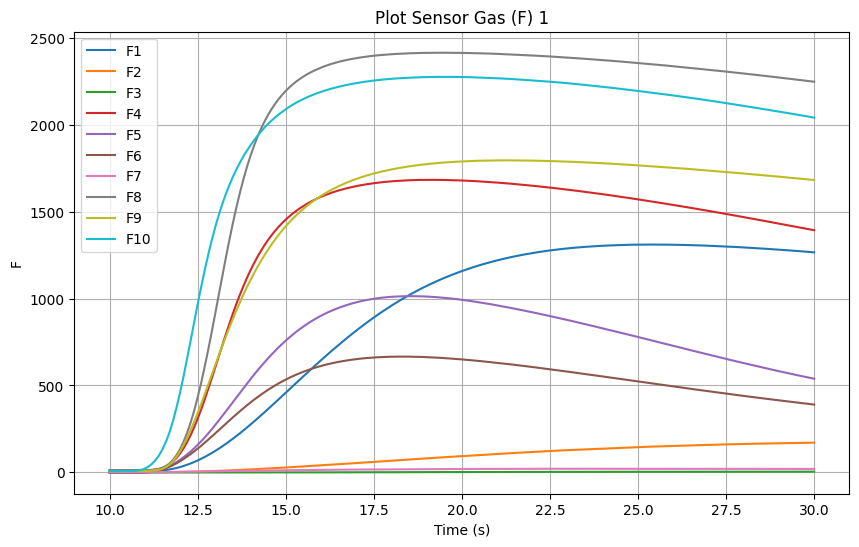

In [13]:
waktu = df1['time(s)']
sensor = df1.drop(['time(s)'], axis=1) #Time harus dihilangkan karena bukan sensor
plt.figure(figsize=(10,6))
plt.plot(waktu,sensor['F1'], label ='F1')
plt.plot(waktu,sensor['F2'], label ='F2')
plt.plot(waktu,sensor['F3'], label ='F3')
plt.plot(waktu,sensor['F4'], label ='F4')
plt.plot(waktu,sensor['F5'], label ='F5')
plt.plot(waktu,sensor['F6'], label ='F6')
plt.plot(waktu,sensor['F7'], label ='F7')
plt.plot(waktu,sensor['F8'], label ='F8')
plt.plot(waktu,sensor['F9'], label ='F9')
plt.plot(waktu,sensor['F10'], label ='F10')
plt.title('Plot Sensor Gas (F) 1')
plt.xlabel('Time (s)')
plt.ylabel('F')
plt.grid(True)
plt.legend()

#### a. Untuk setiap respon sensor hitunglah gradien terbesar (gradmax)

In [14]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Inisialisasi DataFrame untuk menyimpan hasil perhitungan
result_df_list = []

# Looping untuk menghitung gradien pada semua data frame
for i in range(1, 71):
    df_name = f"df{i}"
    if df_name in dfs_dict:
        current_df = dfs_dict[df_name]
        kolom_f = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10']

        for kolom in kolom_f:
            gradien_kolom = np.gradient(current_df[kolom], current_df['time(s)'])

            # Mencari nilai gradien maksimum dan indeksnya
            idx_max = np.argmax(gradien_kolom)
            nilai_max = gradien_kolom[idx_max]
            waktu_max = current_df.at[current_df.index[idx_max], 'time(s)']

            # Membangun DataFrame untuk setiap iterasi
            df_iteration = pd.DataFrame({
                'DataFrame': [df_name],
                'Kolom': [kolom],
                'Nilai Max Gradien': [nilai_max],
                'Pada Saat (s)': [waktu_max]
            })

            # Menambahkan DataFrame ke hasil perhitungan
            result_df_list.append(df_iteration)

# Menggabungkan semua hasil perhitungan menjadi satu DataFrame tunggal
result_df = pd.concat(result_df_list, ignore_index=True)
print('df1 sampai df70 pertama adalah Zat A, df1 sampai df70 kedua adalah Zat B')
# Mencetak hasil perhitungan untuk setiap DataFrame
for df_name in result_df['DataFrame'].unique():
    print(f"\nDataFrame: {df_name}")
    df_iteration = result_df[result_df['DataFrame'] == df_name].drop(columns=['DataFrame'])
    print(tabulate(df_iteration, headers='keys', tablefmt='grid', showindex=False))

df1 sampai df70 pertama adalah Zat A, df1 sampai df70 kedua adalah Zat B

DataFrame: df1
+---------+---------------------+-----------------+
| Kolom   |   Nilai Max Gradien |   Pada Saat (s) |
+=========+=====================+=================+
| F1      |             190     |            15.3 |
+---------+---------------------+-----------------+
| F2      |              14.375 |            18.2 |
+---------+---------------------+-----------------+
| F3      |               1.25  |            18.7 |
+---------+---------------------+-----------------+
| F4      |             638.125 |            13   |
+---------+---------------------+-----------------+
| F5      |             270.625 |            13.5 |
+---------+---------------------+-----------------+
| F6      |             185     |            13   |
+---------+---------------------+-----------------+
| F7      |               4.375 |            12.9 |
+---------+---------------------+-----------------+
| F8      |            1073

In [15]:
df70.describe()

,time(s),F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,20.000000,981.405989,112.160460,2.900330,1376.008595,803.288837,500.199291,8.223949,2081.011810,1396.462040,1937.638315
std,5.816786,510.085981,77.745099,1.816119,523.420560,342.493004,205.975370,4.519728,788.231898,534.889481,636.668774
min,10.000000,3.103750,0.502500,0.216250,11.977500,-0.693750,-3.942500,-1.111250,12.373750,7.120000,7.551250
25%,15.000000,585.728750,35.502500,0.966250,1508.352500,764.806250,477.932500,5.138750,2335.498750,1434.370000,2133.926250
50%,20.000000,1283.478750,116.502500,3.216250,1604.227500,927.681250,571.307500,10.388750,2441.123750,1662.620000,2201.551250
75%,25.000000,1383.103750,186.252500,4.716250,1668.227500,1052.681250,647.682500,12.013750,2475.498750,1694.870000,2241.051250
max,30.000000,1398.853750,226.377500,5.341250,1690.602500,1100.556250,677.182500,12.388750,2487.248750,1706.870000,2254.551250


#### b. Simpan nilai gradmax tiap sampel pada tabel, kemudian beri label A atau B pada kolom akhir sesuai jenis zat. Sehingga diperoleh tabel ukuran 70x11. Simpan data dengan nama gradmax.csv


In [16]:
# Inisiasi dataframe gradmax
columns_gradmax = [f"gradmF{i}" for i in range(1, 11)]
columns_gradmax.append('label')
gradmax = pd.DataFrame(columns=columns_gradmax)

# Looping untuk menghitung gradien pada semua data frame dan mengisi dataframe gradmax
for i in range(1, 71):
    df_name = f"df{i}"
    if df_name in dfs_dict:
        current_df = dfs_dict[df_name]

        # Misalkan F1 hingga F10 adalah kolom yang ingin dihitung gradiennya
        kolom_f = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10']

        row_data = []
        for kolom in kolom_f:
            gradien_kolom = np.gradient(current_df[kolom], current_df['time(s)'], edge_order=2)

            # Mencari nilai gradien maksimum
            nilai_max = np.max(gradien_kolom)
            row_data.append(nilai_max)

        # Menambahkan label A atau B
        label = 'A' if i <= 35 else 'B'
        row_data.append(label)

        # Menambahkan data ke list untuk concat
        gradmax_part = pd.DataFrame([row_data], columns=columns_gradmax)
        gradmax = pd.concat([gradmax, gradmax_part], ignore_index=True)
    else:
        print(f"{df_name} tidak ditemukan dalam dfs_dict.")

# Menampilkan dataframe gradmax
gradmax

,gradmF1,gradmF2,gradmF3,gradmF4,gradmF5,gradmF6,gradmF7,gradmF8,gradmF9,gradmF10,label
0,190.000,14.375,1.250,638.125,270.625,185.000,4.375,1073.750,561.875,1053.125,A
1,274.375,23.750,3.750,840.625,416.250,271.875,6.250,1433.125,710.000,1261.250,A
2,110.000,7.500,1.875,414.375,138.125,100.000,3.125,670.000,335.000,734.375,A
3,145.000,10.000,1.875,533.750,201.250,138.750,3.750,889.375,451.250,895.625,A
4,212.500,16.875,1.250,703.125,306.250,216.875,5.000,1177.500,579.375,1075.000,A
...,...,...,...,...,...,...,...,...,...,...,...
65,184.375,14.375,1.250,579.375,241.875,160.000,4.375,1012.500,491.875,1100.625,B
66,233.750,20.000,2.500,750.625,323.750,210.625,3.750,1261.250,656.250,1297.500,B
67,220.000,19.375,0.625,659.375,303.125,196.250,3.750,1161.250,562.500,1175.000,B
68,232.500,21.250,1.250,766.250,323.125,220.000,6.250,1245.000,631.875,1258.125,B


In [17]:
# Menyimpan dataframe gradmax ke dalam file CSV
gradmax.to_csv('gradmax.csv', index=False)

# Menampilkan pesan jika proses penyimpanan berhasil
print("Dataframe gradmax berhasil disimpan ke dalam gradmax.csv")

Dataframe gradmax berhasil disimpan ke dalam gradmax.csv


#### c. Berikan analisa terhadap data (menjawab apakah dari gradmax kedua zat bisa terbedakan?)


In [18]:
dataGrad_max = pd.read_csv('gradmax.csv')
dataGrad_max

,gradmF1,gradmF2,gradmF3,gradmF4,gradmF5,gradmF6,gradmF7,gradmF8,gradmF9,gradmF10,label
0,190.000,14.375,1.250,638.125,270.625,185.000,4.375,1073.750,561.875,1053.125,A
1,274.375,23.750,3.750,840.625,416.250,271.875,6.250,1433.125,710.000,1261.250,A
2,110.000,7.500,1.875,414.375,138.125,100.000,3.125,670.000,335.000,734.375,A
3,145.000,10.000,1.875,533.750,201.250,138.750,3.750,889.375,451.250,895.625,A
4,212.500,16.875,1.250,703.125,306.250,216.875,5.000,1177.500,579.375,1075.000,A
...,...,...,...,...,...,...,...,...,...,...,...
65,184.375,14.375,1.250,579.375,241.875,160.000,4.375,1012.500,491.875,1100.625,B
66,233.750,20.000,2.500,750.625,323.750,210.625,3.750,1261.250,656.250,1297.500,B
67,220.000,19.375,0.625,659.375,303.125,196.250,3.750,1161.250,562.500,1175.000,B
68,232.500,21.250,1.250,766.250,323.125,220.000,6.250,1245.000,631.875,1258.125,B


#### Analisa sederhana mean dan std apakah sama

In [19]:
label_A_data = gradmax[gradmax['label'] == 'A'].iloc[:, :-1]  # Exclude the 'label' column
label_B_data = gradmax[gradmax['label'] == 'B'].iloc[:, :-1]

def compare_statistics(data1, data2):
    mean1 = np.mean(data1, axis=0)
    std1 = np.std(data1, axis=0)

    mean2 = np.mean(data2, axis=0)
    std2 = np.std(data2, axis=0)

    mean_equal = np.allclose(mean1, mean2)
    std_equal = np.allclose(std1, std2)

    return mean_equal, std_equal

table_data = []

for col in columns_gradmax[:-1]:
    data_subset_A = label_A_data[col]
    data_subset_B = label_B_data[col]

    mean_equal, std_equal = compare_statistics(data_subset_A, data_subset_B)

    table_data.append([col, mean_equal, std_equal])

# Menampilkan tabel menggunakan tabulate
table_headers = ["Label", "Apakah mean sama antara A dan B", "Apakah standar deviasi sama antara A dan B"]
table = tabulate(table_data, headers=table_headers, tablefmt="grid")

print("\nTabel Perbandingan Statistik:")
print(table)


Tabel Perbandingan Statistik:
+----------+-----------------------------------+----------------------------------------------+
| Label    | Apakah mean sama antara A dan B   | Apakah standar deviasi sama antara A dan B   |
+==========+===================================+==============================================+
| gradmF1  | False                             | False                                        |
+----------+-----------------------------------+----------------------------------------------+
| gradmF2  | False                             | False                                        |
+----------+-----------------------------------+----------------------------------------------+
| gradmF3  | False                             | False                                        |
+----------+-----------------------------------+----------------------------------------------+
| gradmF4  | False                             | False                                        |
+--------

#### KS-Test

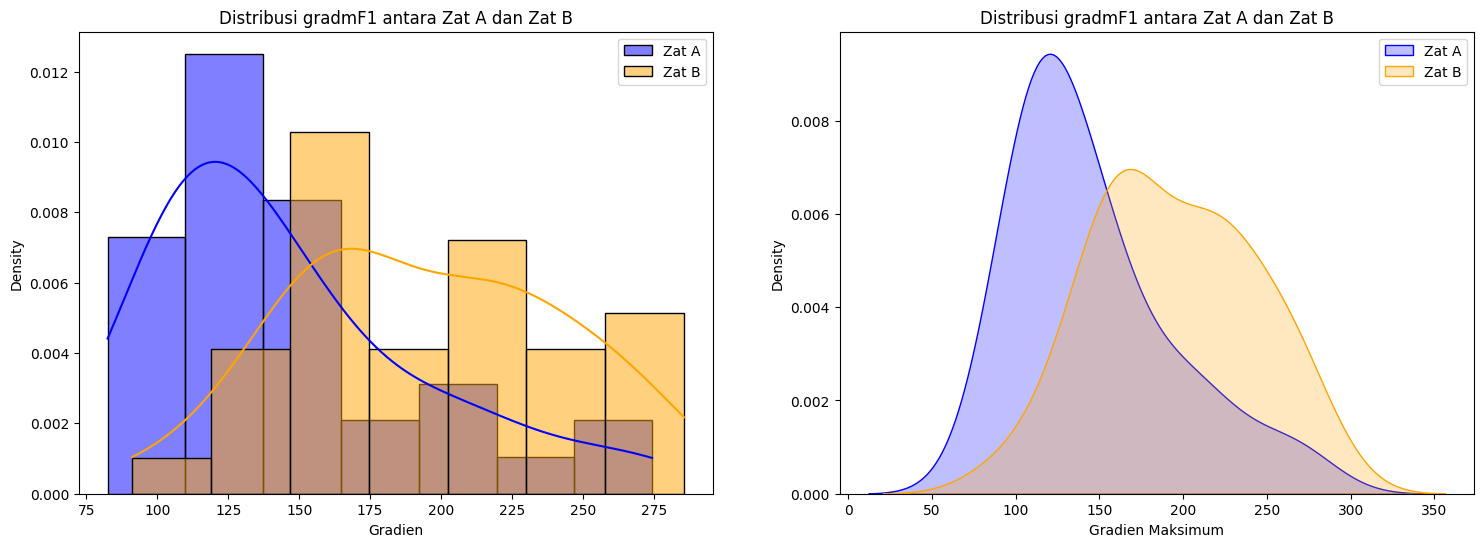

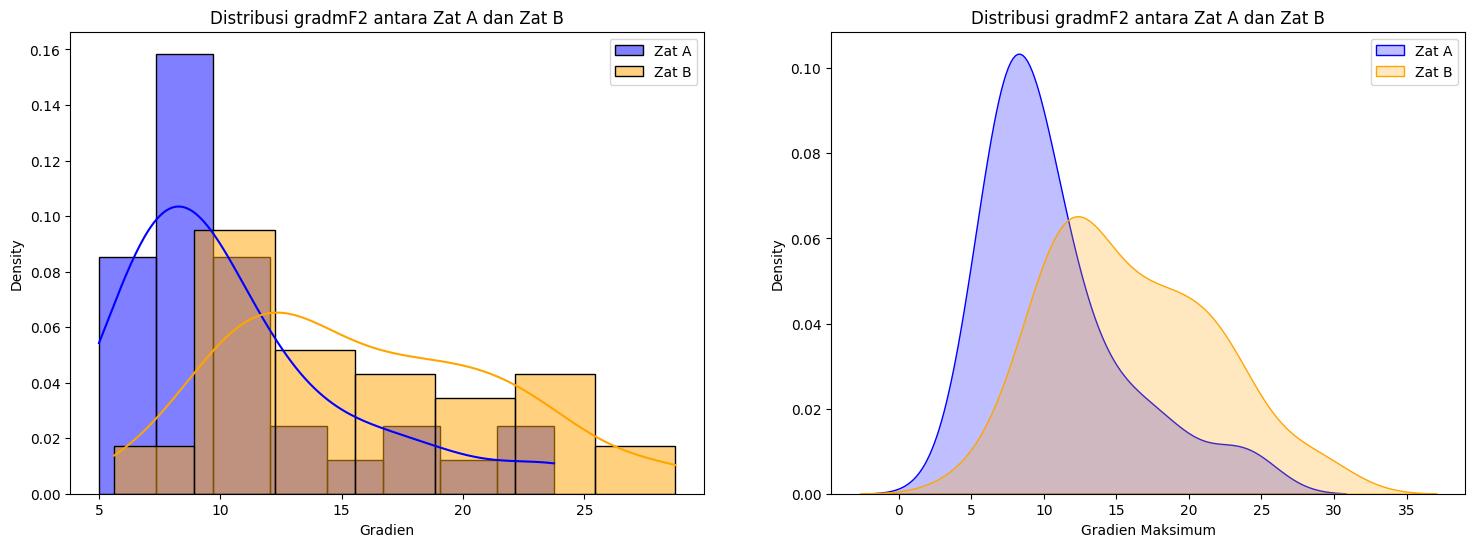

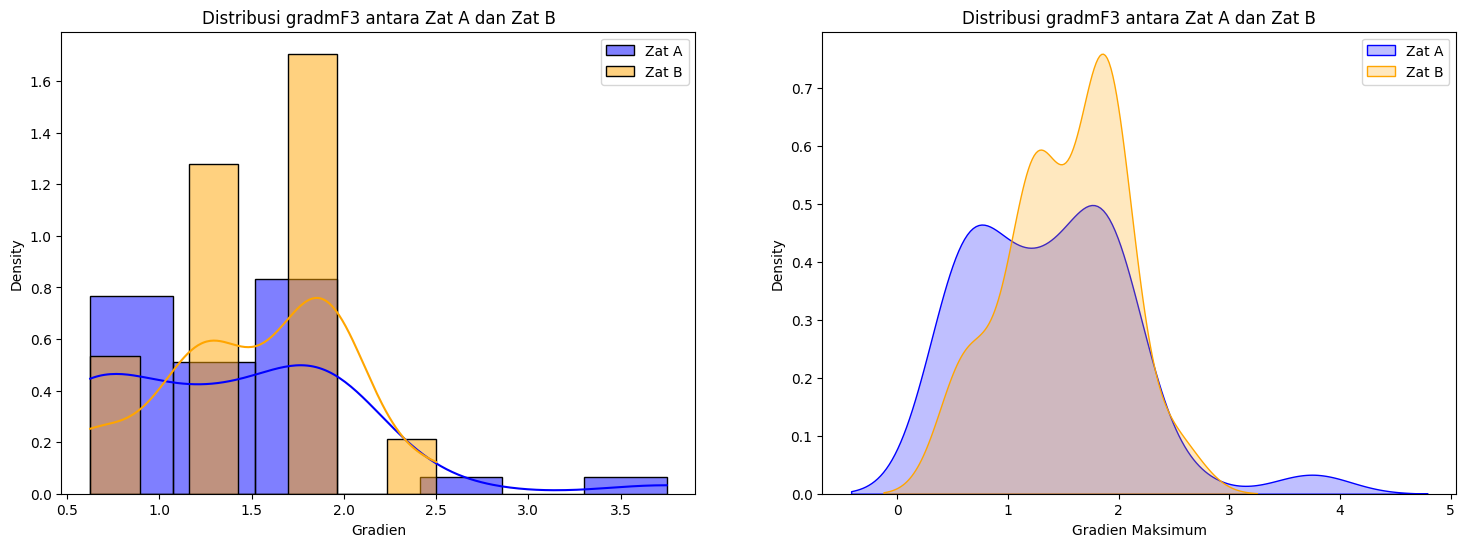

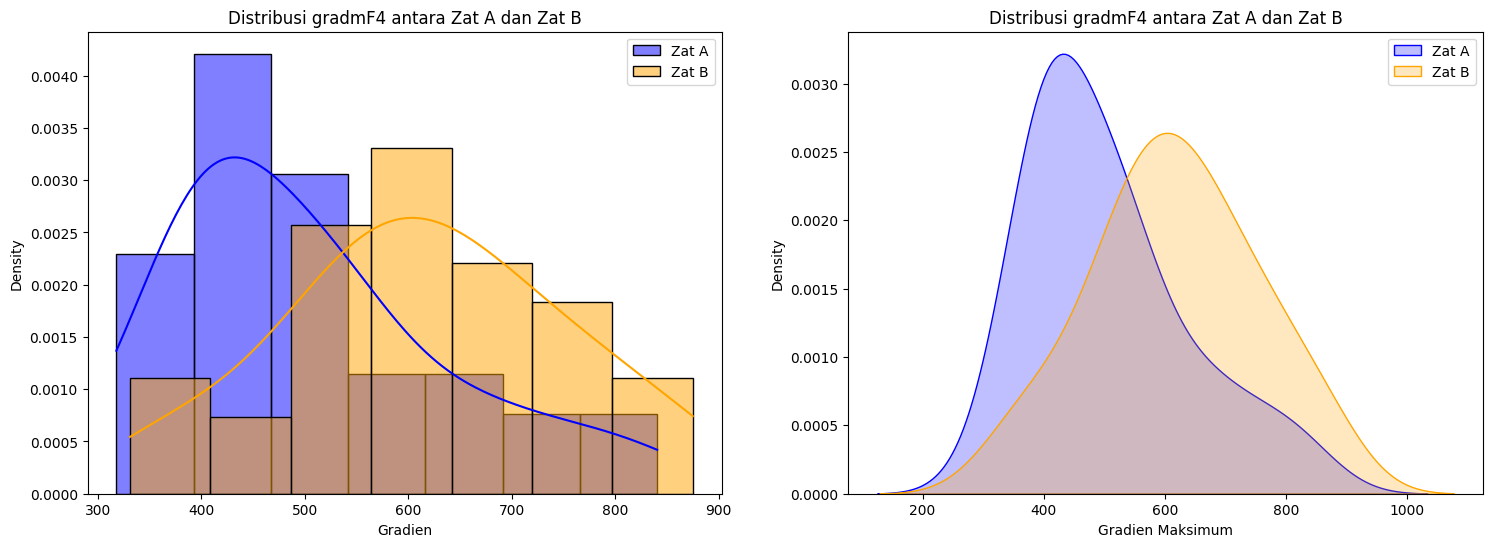

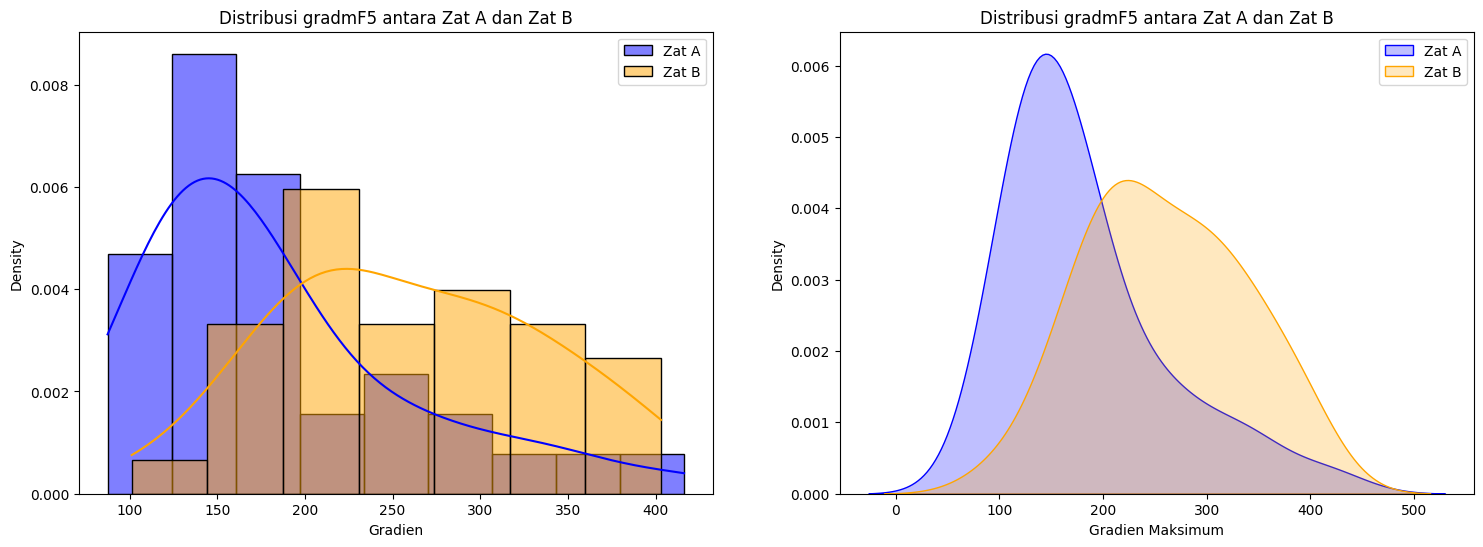

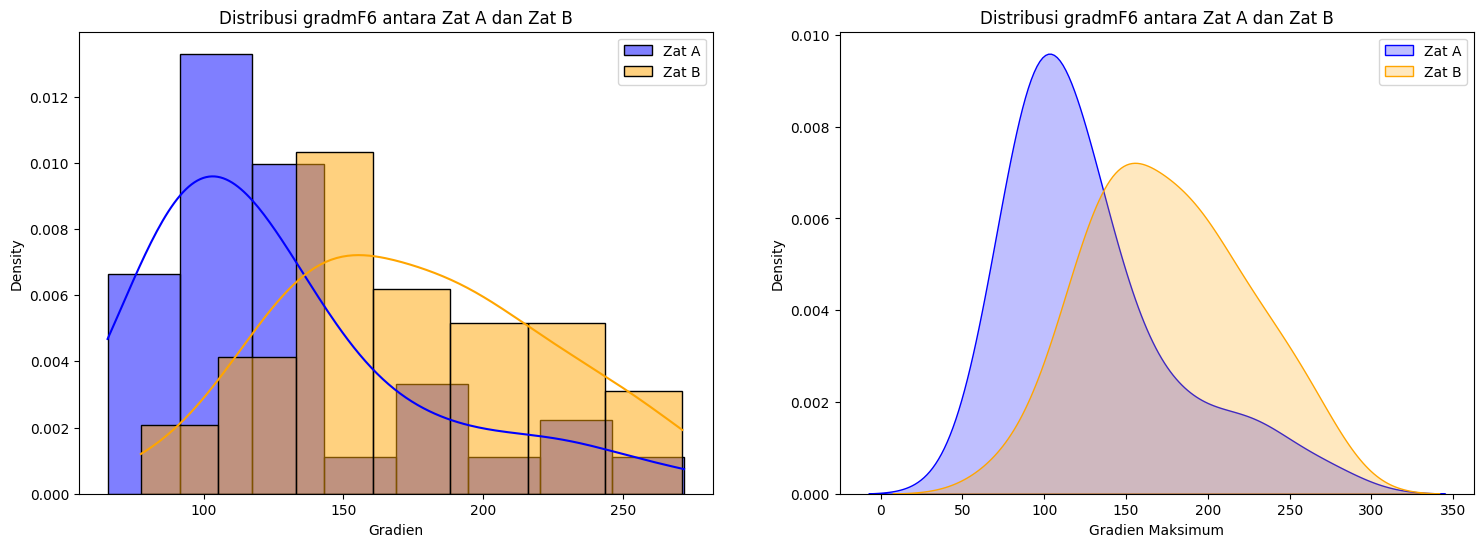

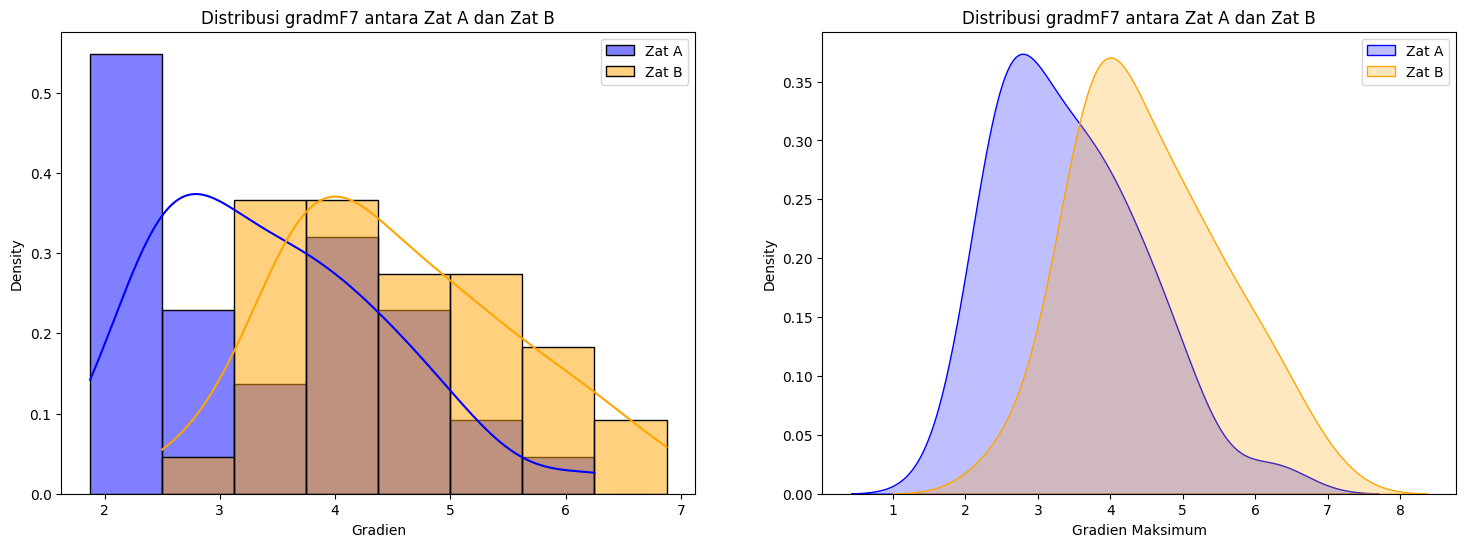

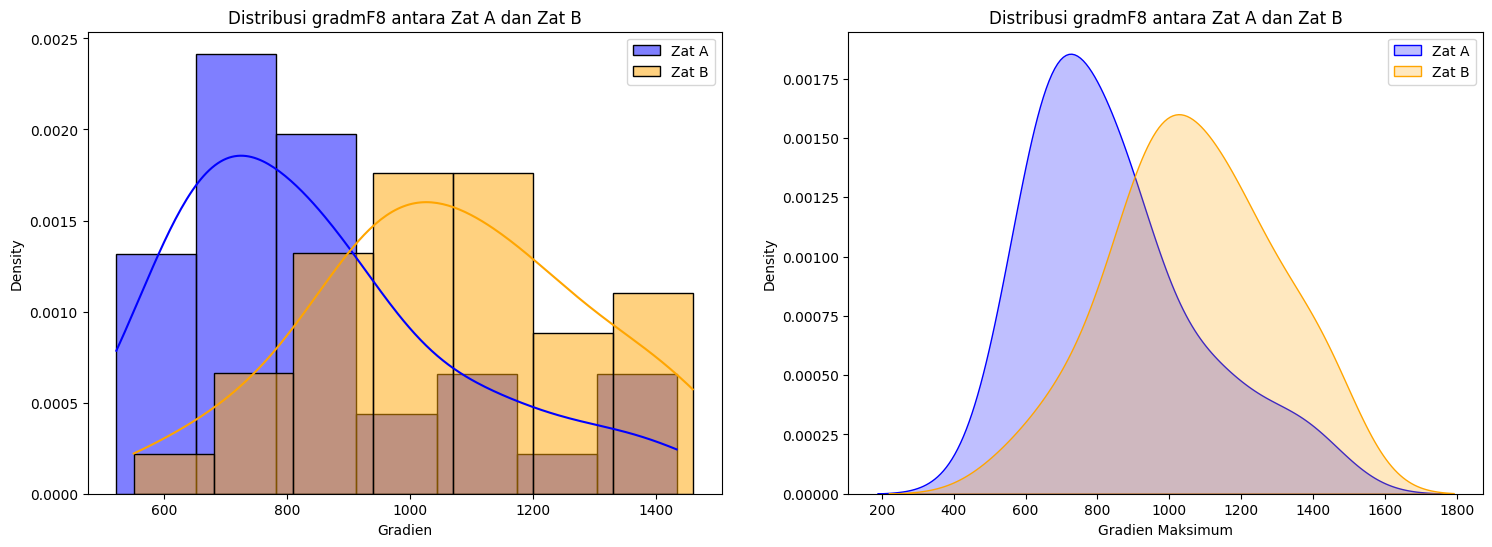

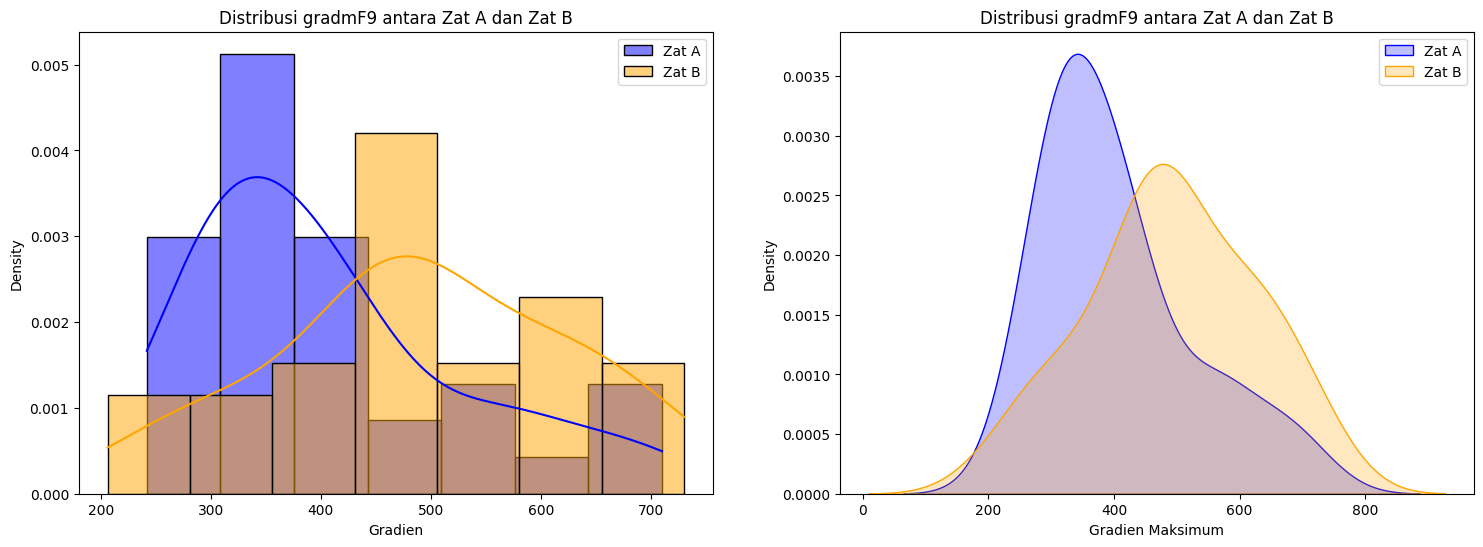

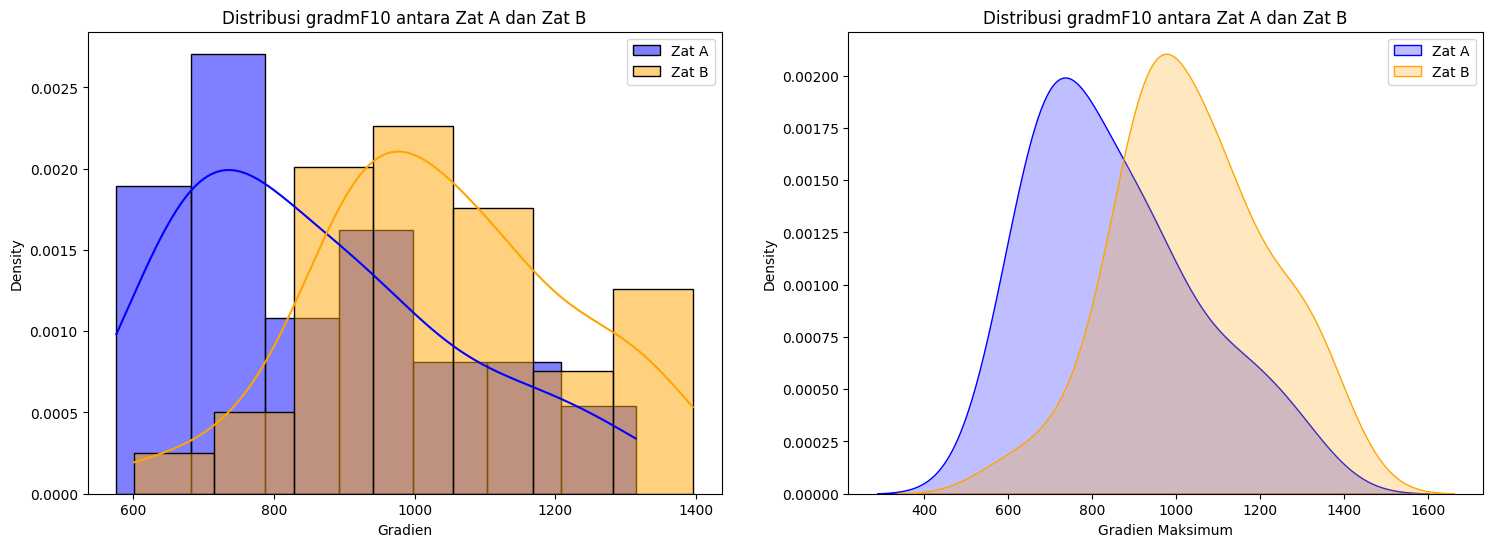

In [20]:
data_zat_A = dataGrad_max[dataGrad_max['label'] == 'A']
data_zat_B = dataGrad_max[dataGrad_max['label'] == 'B']

kolom_to_plot = dataGrad_max.columns[:-1]  # Exclude kolom label

for kolom in kolom_to_plot:
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(data_zat_A[kolom], label='Zat A', kde=True, color='blue', stat='density')
    sns.histplot(data_zat_B[kolom], label='Zat B', kde=True, color='orange', stat='density')
    plt.title(f'Distribusi {kolom} antara Zat A dan Zat B')
    plt.xlabel('Gradien')
    plt.ylabel('Density')
    plt.legend()

    # Plot kedua
    plt.subplot(1, 2, 2)
    sns.kdeplot(data_zat_A[kolom], label='Zat A', color='blue', fill='True')
    sns.kdeplot(data_zat_B[kolom], label='Zat B', color='orange', fill='True')
    plt.title(f'Distribusi {kolom} antara Zat A dan Zat B')
    plt.xlabel('Gradien Maksimum')
    plt.ylabel('Density')
    plt.legend()

    plt.show()


In [21]:
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

# Lakukan uji Kolmogorov-Smirnov untuk setiap kolom
data_zat_A = dataGrad_max[dataGrad_max['label'] == 'A']
data_zat_B = dataGrad_max[dataGrad_max['label'] == 'B']

for kolom in dataGrad_max.columns[:-1]:  # Exclude kolom label
    statistic, p_value = ks_2samp(data_zat_A[kolom], data_zat_B[kolom])

    print(f"Uji Kolmogorov-Smirnov untuk {kolom}:")
    print(f"  Statistik Uji KS: {statistic}")
    print(f"  Nilai p: {p_value}")

    if p_value < 0.05:
        print("  Hipotesis nol ditolak. Ada perbedaan signifikan antara distribusi.")
    else:
        print("  Hipotesis nol tidak ditolak. Tidak ada perbedaan signifikan antara distribusi.")
    print("\n")


Uji Kolmogorov-Smirnov untuk gradmF1:
  Statistik Uji KS: 0.4857142857142857
  Nilai p: 0.00041352891306427824
  Hipotesis nol ditolak. Ada perbedaan signifikan antara distribusi.


Uji Kolmogorov-Smirnov untuk gradmF2:
  Statistik Uji KS: 0.5428571428571428
  Nilai p: 4.421378315781605e-05
  Hipotesis nol ditolak. Ada perbedaan signifikan antara distribusi.


Uji Kolmogorov-Smirnov untuk gradmF3:
  Statistik Uji KS: 0.2
  Nilai p: 0.49164475706932775
  Hipotesis nol tidak ditolak. Tidak ada perbedaan signifikan antara distribusi.


Uji Kolmogorov-Smirnov untuk gradmF4:
  Statistik Uji KS: 0.45714285714285713
  Nilai p: 0.001131763341017052
  Hipotesis nol ditolak. Ada perbedaan signifikan antara distribusi.


Uji Kolmogorov-Smirnov untuk gradmF5:
  Statistik Uji KS: 0.5428571428571428
  Nilai p: 4.421378315781605e-05
  Hipotesis nol ditolak. Ada perbedaan signifikan antara distribusi.


Uji Kolmogorov-Smirnov untuk gradmF6:
  Statistik Uji KS: 0.5142857142857142
  Nilai p: 0.000140443

In [22]:
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt# Lakukan uji Kolmogorov-Smirnov untuk setiap kolom
data_zat_A = dataGrad_max[dataGrad_max['label'] == 'A']
data_zat_B = dataGrad_max[dataGrad_max['label'] == 'B']

ks_table_data = []

for kolom in dataGrad_max.columns[:-1]:
    statistic, p_value = ks_2samp(data_zat_A[kolom], data_zat_B[kolom])

    label = f"{kolom} (A vs B)"
    ks_table_data.append([label, statistic, p_value])

ks_table_data_with_pvalue = []

for row in ks_table_data:
    label, statistic, p_value = row
    significance = "Tolak" if p_value < 0.05 else "Terima"
    ks_table_data_with_pvalue.append([label, statistic, p_value, significance])

ks_table_headers = ["Label", "Statistik Uji KS", "Nilai p", "Signifikansi"]
ks_table = tabulate(ks_table_data_with_pvalue, headers=ks_table_headers, tablefmt="grid")

print("\nTabel Uji Kolmogorov-Smirnov:")
print(ks_table)


Tabel Uji Kolmogorov-Smirnov:
+-------------------+--------------------+-------------+----------------+
| Label             |   Statistik Uji KS |     Nilai p | Signifikansi   |
+===================+====================+=============+================+
| gradmF1 (A vs B)  |           0.485714 | 0.000413529 | Tolak          |
+-------------------+--------------------+-------------+----------------+
| gradmF2 (A vs B)  |           0.542857 | 4.42138e-05 | Tolak          |
+-------------------+--------------------+-------------+----------------+
| gradmF3 (A vs B)  |           0.2      | 0.491645    | Terima         |
+-------------------+--------------------+-------------+----------------+
| gradmF4 (A vs B)  |           0.457143 | 0.00113176  | Tolak          |
+-------------------+--------------------+-------------+----------------+
| gradmF5 (A vs B)  |           0.542857 | 4.42138e-05 | Tolak          |
+-------------------+--------------------+-------------+----------------+
| gradm

#### Karena telah diketahui ada perbedaan signifikan zat A dan zat B, maka dilakukan SVM

Accuracy: 0.64

Classification Report:
              precision    recall  f1-score   support

           A       1.00      0.50      0.67        10
           B       0.44      1.00      0.62         4

    accuracy                           0.64        14
   macro avg       0.72      0.75      0.64        14
weighted avg       0.84      0.64      0.65        14


Confusion Matrix:
[[5 5]
 [0 4]]


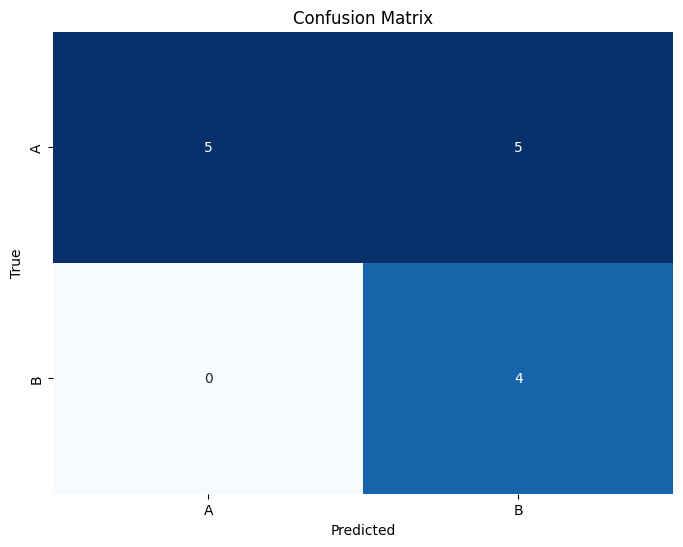

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = dataGrad_max.drop('label', axis=1)
y = dataGrad_max['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', C=1.0, random_state=42)

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_rep)
print('\nConfusion Matrix:')
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Analisis Narasi
Uji Kolmogorov-Smirnov (KS-Test) adalah uji statistik non-parametrik yang digunakan untuk menguji kesamaan atau kesesuaian distribusi empiris dari suatu sampel data dengan distribusi teoritis tertentu atau dengan distribusi empiris dari sampel lain. Uji Kolmogorov-Smirnov sensitif terhadap perbedaan di seluruh distribusi, sehingga dapat mendeteksi perbedaan dalam bentuk distribusi atau pergeseran keseluruhan. Uji ini dapat digunakan untuk menguji apakah kedua sampel data berasal dari distribusi tertentu, seperti persoalan ini. Didapatkan keseluruhan hasil menunjukkan hipotesis nol ditolak kecuali F3. Data F3 terjadi anomali. Sehingga ada perbedaan signifikan antara distribusi. Artinya ada perbedaan antara zat A dan zat B.

Melanjutkan hal ini, maka saya berinisiatif melakukan tes lanjutkan seberapa jauh perbedaan itu melalui Support Vector Machine (SVM). Menurut kajian literatur, Support Vector Machine (SVM) adalah algoritma pembelajaran mesin yang digunakan untuk tugas klasifikasi dan regresi. SVM bekerja dengan mencari hyperplane (bidang pemisah) optimal yang memisahkan dua kelas dalam ruang fitur. Dengan kata lain, SVM mencoba menemukan batas akurasi, presisi, dan lain-lain untuk memisahkan dua kelas dalam ruang fitur. Dari hasil, zat A dan B memiliki akurasi 0.64, ini mengindikasikan bahwa data zat A dan B berhasil terbedakan yang memiliki perbedaan sekitar 36% pada fitur gradien maksimum, serta ada faktor-faktor lain yang mempengaruhi zat A dan zat B berdasarkan gradien maksimum yang diketahui.

Pendapat saya perbedaan ini dihasilkan oleh sudah pasti karena perbedaan zat, kemudian parameter yang ditentukan peneliti yang mengambil suatu data sensor ini. Entah itu temperatur, posisi, kecepatan, dan lain-lain.

#2. Fitur Koefisien Fourier Terbesar.

#### a. Ulangi pekerjaan soal no. 1 tetapi menggunakan FFT. Hitung nilai FFT terbesar untuk masing-masing respon sensor, kemudian beri label A atau B pada kolom akhir sesuai jenis zat. Sehingga diperoleh tabel ukuran 70x11. Simpan data dengan nama fouriermax.csv

#### Read data from zip file

In [24]:
#Pada zip di epsilon, saya modifikasi agar saat membuka zip langsung data csv, bukan folder lagi agar bisa dibaca code ini. Dataset zip hasil modifikasi:
# https://drive.google.com/drive/folders/18AeTy7qTjWBnILkeBgnF2YoYfdG8zu3L?usp=drive_link
#Code berikut dibuat untuk membaca 70 dataset dengan lebih efisien
import zipfile
zip_file_name = "Data_crop1030.zip"

dataframes = []

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    for i in range(1, 71):
        file_type = "_A_" if i <= 35 else "_B_"
        if i <= 35:
            file_index = i
        else:
            file_index = i - 35

        file_name = f"{file_type}{file_index}_crop1030.csv"
        with zip_ref.open(file_name) as file:
            df = pd.read_csv(file)
        dataframes.append(df)

df_names = [f"df{i}" for i in range(1, 71)]
dfs_dict = dict(zip(df_names, dataframes))

for i in range(1, 71):
    df_name = f"df{i}"
    if df_name in dfs_dict:
        globals()[df_name] = dfs_dict[df_name]
    else:
        print(f"{df_name} tidak ditemukan dalam dfs_dict.")

#### Untuk tiap sensor dihitung fourier terbesar

In [25]:
import pandas as pd
from tabulate import tabulate
import numpy as np

# Inisialisasi DataFrame untuk menyimpan hasil perhitungan FFT
result_df_list = []

# Looping untuk menghitung FFT pada semua data frame
for i in range(1, 71):
    df_name = f"df{i}"
    if df_name in dfs_dict:
        current_df = dfs_dict[df_name]
        kolom_f = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10']

        for kolom in kolom_f:
            # Hitung FFT
            fft_result = np.fft.fft(current_df[kolom])
            freq = np.fft.fftfreq(len(fft_result), d=current_df['time(s)'].diff().mean())
            magnitude = np.abs(fft_result)

            # Temukan frekuensi dengan magnitudo maksimum
            idx_max_fft = np.argmax(magnitude)
            freq_max_fft = freq[idx_max_fft]
            magnitude_max_fft = magnitude[idx_max_fft]

            # Membangun DataFrame untuk setiap iterasi FFT
            df_iteration_fft = pd.DataFrame({
                'DataFrame': [df_name],
                'Kolom': [kolom],
                'Frekuensi Maksimum (Hz)': [freq_max_fft],
                'Magnitudo Maksimum': [magnitude_max_fft]
            })

            # Menambahkan DataFrame ke hasil perhitungan FFT
            result_df_list.append(df_iteration_fft)

# Menggabungkan semua hasil perhitungan menjadi satu DataFrame tunggal
result_df = pd.concat(result_df_list, ignore_index=True)

# Mencetak hasil perhitungan untuk setiap DataFrame
for df_name in result_df['DataFrame'].unique():
    print(f"\nDataFrame: {df_name}")
    df_iteration = result_df[result_df['DataFrame'] == df_name].drop(columns=['DataFrame'])
    print(tabulate(df_iteration, headers='keys', tablefmt='grid', showindex=False))

print('Hasil ini berlaku pembulatan karena pakai tabulate')


DataFrame: df1
+---------+---------------------------+----------------------+
| Kolom   |   Frekuensi Maksimum (Hz) |   Magnitudo Maksimum |
+=========+===========================+======================+
| F1      |                         0 |           178175     |
+---------+---------------------------+----------------------+
| F2      |                         0 |            17534.1   |
+---------+---------------------------+----------------------+
| F3      |                         0 |              245.965 |
+---------+---------------------------+----------------------+
| F4      |                         0 |           264519     |
+---------+---------------------------+----------------------+
| F5      |                         0 |           138131     |
+---------+---------------------------+----------------------+
| F6      |                         0 |            93853.7   |
+---------+---------------------------+----------------------+
| F7      |                         0 |

#### Simpan nilai fouriermax tiap sampel pada tabel, kemudian beri label A atau B pada kolom akhir sesuai jenis zat. Sehingga diperoleh tabel ukuran 70x11. Simpan data dengan nama fouriermax.csv

In [26]:
# Inisiasi dataframe fouriermax
columns_fouriermax = [f"fouriermF{i}" for i in range(1, 11)]
columns_fouriermax.append('label')
fouriermax = pd.DataFrame(columns=columns_fouriermax)

# Looping untuk menghitung gradien pada semua data frame dan mengisi dataframe fouriermax
for i in range(1, 71):
    df_name = f"df{i}"
    if df_name in dfs_dict:
        current_df = dfs_dict[df_name]

        # Misalkan F1 hingga F10 adalah kolom yang ingin dihitung gradiennya
        kolom_f = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10']

        row_data = []

        for kolom in kolom_f:
            # Hitung FFT
            fft_result = np.fft.fft(current_df[kolom])
            freq = np.fft.fftfreq(len(fft_result), d=current_df['time(s)'].diff().mean())
            magnitude = np.abs(fft_result)

            current_df[f'Fourier_{kolom}'] = np.abs(fft_result)

            # Mencari nilai gradien maksimum dan indeksnya
            nilai_max = current_df[f'Fourier_{kolom}'].max()
            row_data.append(nilai_max)

        # Menambahkan label A atau B
        label = 'A' if i <= 35 else 'B'
        row_data.append(label)

        fouriermax_part = pd.DataFrame([row_data], columns=columns_fouriermax)
        fouriermax = pd.concat([fouriermax, fouriermax_part], ignore_index=True)
    else:
        print(f"{df_name} tidak ditemukan dalam dfs_dict.")

# Menampilkan dataframe fouriermax
fouriermax

,fouriermF1,fouriermF2,fouriermF3,fouriermF4,fouriermF5,fouriermF6,fouriermF7,fouriermF8,fouriermF9,fouriermF10,label
0,178175.35875,17534.09250,245.96500,264519.42125,138130.86250,93853.65500,3053.29000,394237.11125,286222.61250,379202.58875,A
1,218205.71250,29858.76250,525.00875,295453.63750,181469.54000,119335.64500,4419.83375,426928.15875,309870.85375,407059.23875,A
2,121967.04625,8565.24125,268.03375,225436.69375,92383.98750,65976.83500,1785.26125,345048.98625,231518.93250,326922.77125,A
3,152126.28000,12160.40750,229.56625,249687.13250,114332.64625,77568.48000,2167.34875,385844.08125,265599.84750,358189.88750,A
4,194220.12125,21773.82000,476.01625,271165.40250,160060.40875,104486.57000,3344.17500,399829.45750,281382.70500,374693.16875,A
...,...,...,...,...,...,...,...,...,...,...,...
65,180673.39125,17999.31875,430.55625,261986.76000,141973.67000,88574.12875,2032.10000,406189.21375,270867.02500,380756.53500,B
66,207409.01625,26045.56875,643.99125,287104.40500,173256.26375,107386.72250,2038.96250,426415.25000,295451.24750,400371.67625,B
67,199464.88125,24233.87750,501.84375,269990.99250,167053.70250,105470.18250,2183.60375,408965.07125,278000.59750,385463.89375,B
68,207922.19875,27055.96500,622.86625,289632.71500,180980.31000,115766.44000,4298.31375,423210.44125,290233.48375,400907.73375,B


In [27]:
# Menyimpan dataframe fouriermax ke dalam file CSV
fouriermax.to_csv('fouriermax.csv', index=False)
print("Dataframe fouriermax berhasil disimpan ke dalam fouriermax.csv")

Dataframe fouriermax berhasil disimpan ke dalam fouriermax.csv


####b. Berikan analisa terhadap data (menjawab apakah dari fouriermax kedua zat bisa terbedakan?)

In [28]:
dataFourier_max = pd.read_csv('fouriermax.csv')
dataFourier_max

,fouriermF1,fouriermF2,fouriermF3,fouriermF4,fouriermF5,fouriermF6,fouriermF7,fouriermF8,fouriermF9,fouriermF10,label
0,178175.35875,17534.09250,245.96500,264519.42125,138130.86250,93853.65500,3053.29000,394237.11125,286222.61250,379202.58875,A
1,218205.71250,29858.76250,525.00875,295453.63750,181469.54000,119335.64500,4419.83375,426928.15875,309870.85375,407059.23875,A
2,121967.04625,8565.24125,268.03375,225436.69375,92383.98750,65976.83500,1785.26125,345048.98625,231518.93250,326922.77125,A
3,152126.28000,12160.40750,229.56625,249687.13250,114332.64625,77568.48000,2167.34875,385844.08125,265599.84750,358189.88750,A
4,194220.12125,21773.82000,476.01625,271165.40250,160060.40875,104486.57000,3344.17500,399829.45750,281382.70500,374693.16875,A
...,...,...,...,...,...,...,...,...,...,...,...
65,180673.39125,17999.31875,430.55625,261986.76000,141973.67000,88574.12875,2032.10000,406189.21375,270867.02500,380756.53500,B
66,207409.01625,26045.56875,643.99125,287104.40500,173256.26375,107386.72250,2038.96250,426415.25000,295451.24750,400371.67625,B
67,199464.88125,24233.87750,501.84375,269990.99250,167053.70250,105470.18250,2183.60375,408965.07125,278000.59750,385463.89375,B
68,207922.19875,27055.96500,622.86625,289632.71500,180980.31000,115766.44000,4298.31375,423210.44125,290233.48375,400907.73375,B


#### Analisa sederhana mean dan std apakah sama

In [29]:
label_data_A = dataFourier_max[dataFourier_max['label'] == 'A'].iloc[:, :-1]  # Exclude the 'label' column
label_data_B = dataFourier_max[dataFourier_max['label'] == 'B'].iloc[:, :-1]

def compare_statistics(data1, data2):
    mean1 = np.mean(data1, axis=0)
    std1 = np.std(data1, axis=0)

    mean2 = np.mean(data2, axis=0)
    std2 = np.std(data2, axis=0)

    mean_equal = np.allclose(mean1, mean2)
    std_equal = np.allclose(std1, std2)

    return mean_equal, std_equal

table_data = []

for col in columns_fouriermax[:-1]:
    data_subset_A = label_data_A[col]
    data_subset_B = label_data_B[col]

    mean_equal, std_equal = compare_statistics(data_subset_A, data_subset_B)

    table_data.append([col, mean_equal, std_equal])

# Menampilkan tabel menggunakan tabulate
table_headers = ["Label", "Apakah mean sama antara A dan B", "Apakah standar deviasi sama antara A dan B"]
table = tabulate(table_data, headers=table_headers, tablefmt="grid")

print("\nTabel Perbandingan Statistik:")
print(table)


Tabel Perbandingan Statistik:
+-------------+-----------------------------------+----------------------------------------------+
| Label       | Apakah mean sama antara A dan B   | Apakah standar deviasi sama antara A dan B   |
+=============+===================================+==============================================+
| fouriermF1  | False                             | False                                        |
+-------------+-----------------------------------+----------------------------------------------+
| fouriermF2  | False                             | False                                        |
+-------------+-----------------------------------+----------------------------------------------+
| fouriermF3  | False                             | False                                        |
+-------------+-----------------------------------+----------------------------------------------+
| fouriermF4  | False                             | False                     

In [30]:
print(col)

fouriermF10


###KS-Test

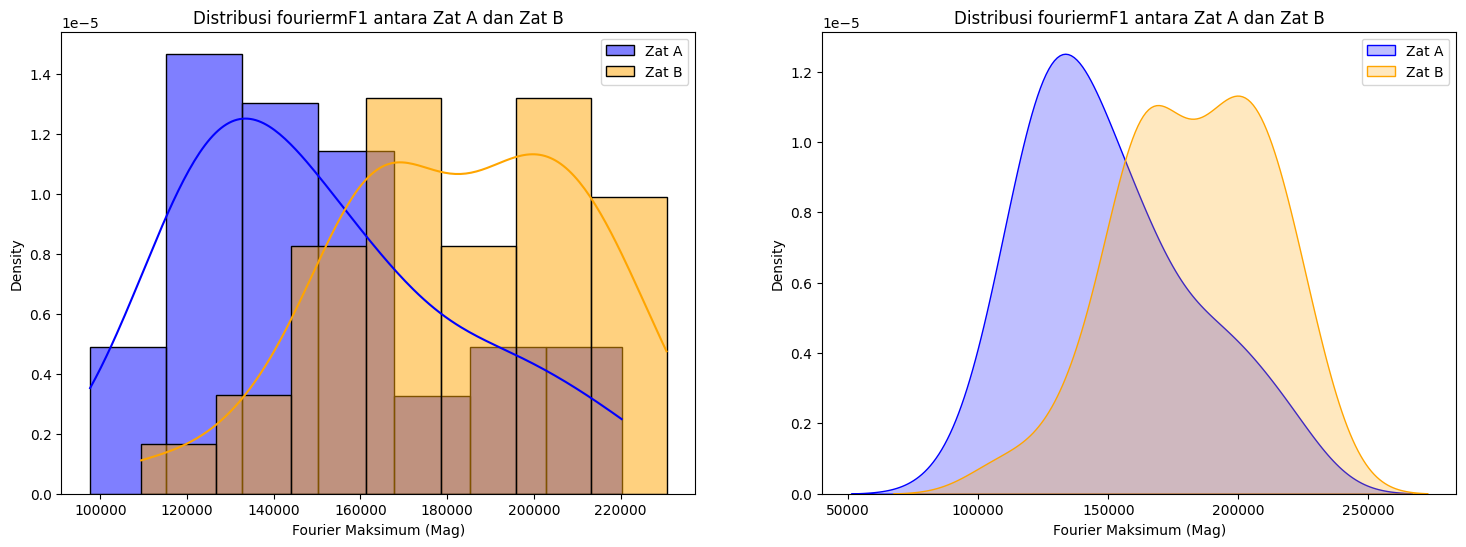

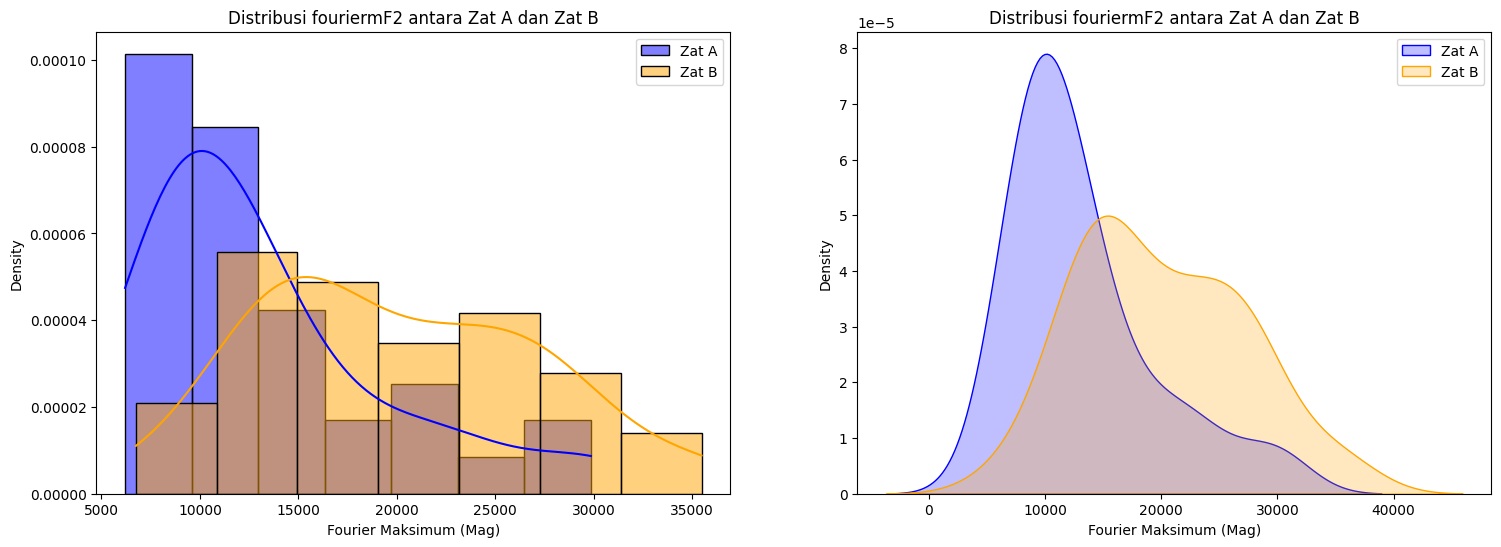

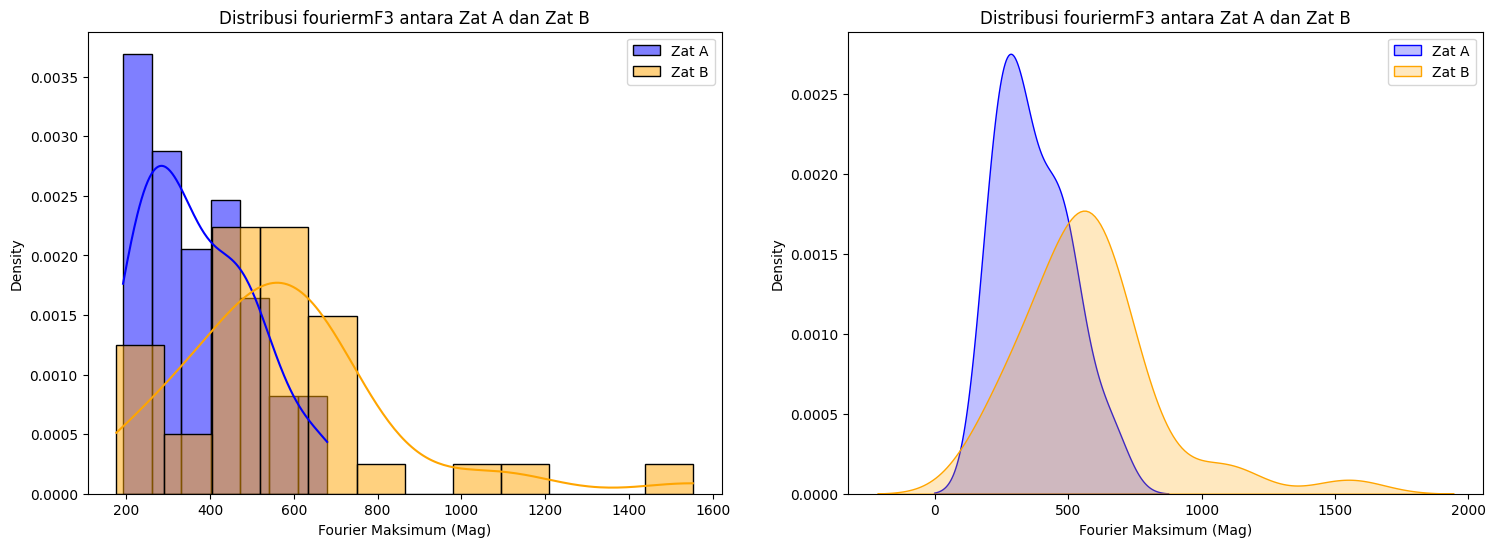

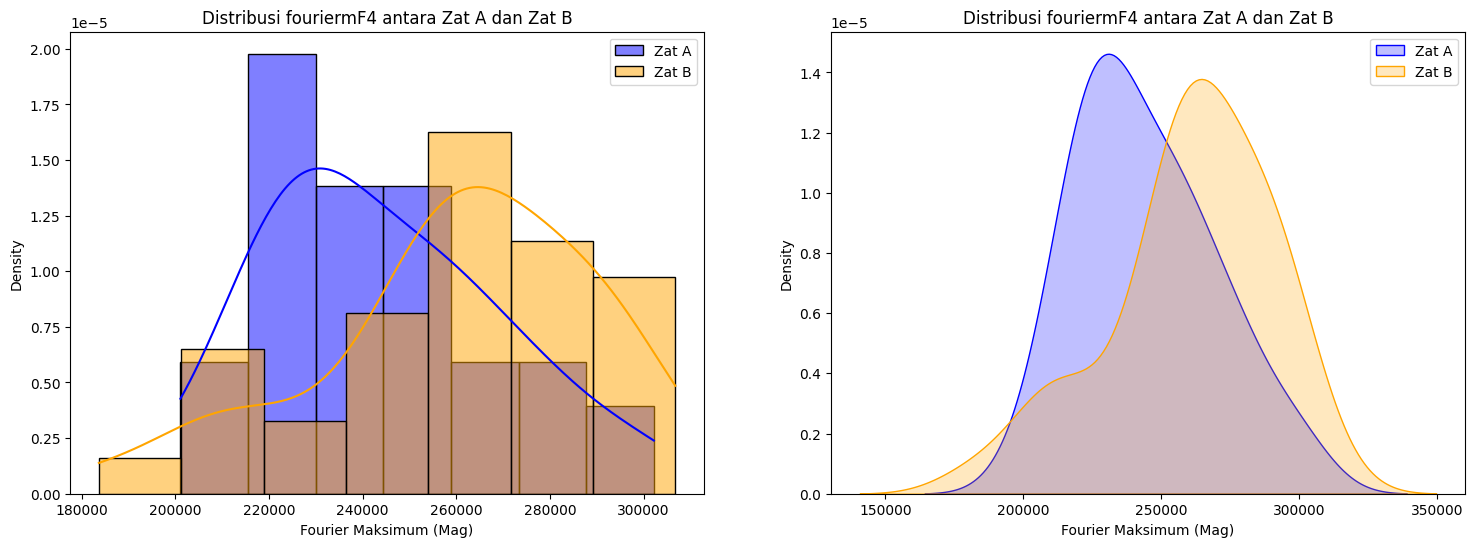

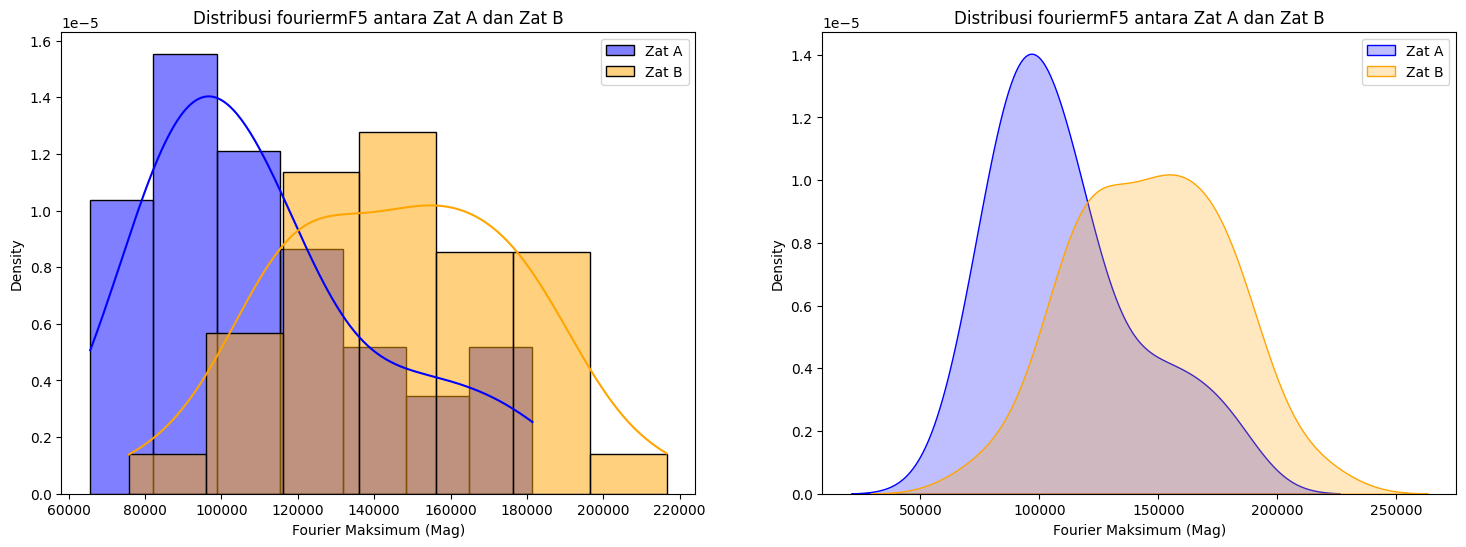

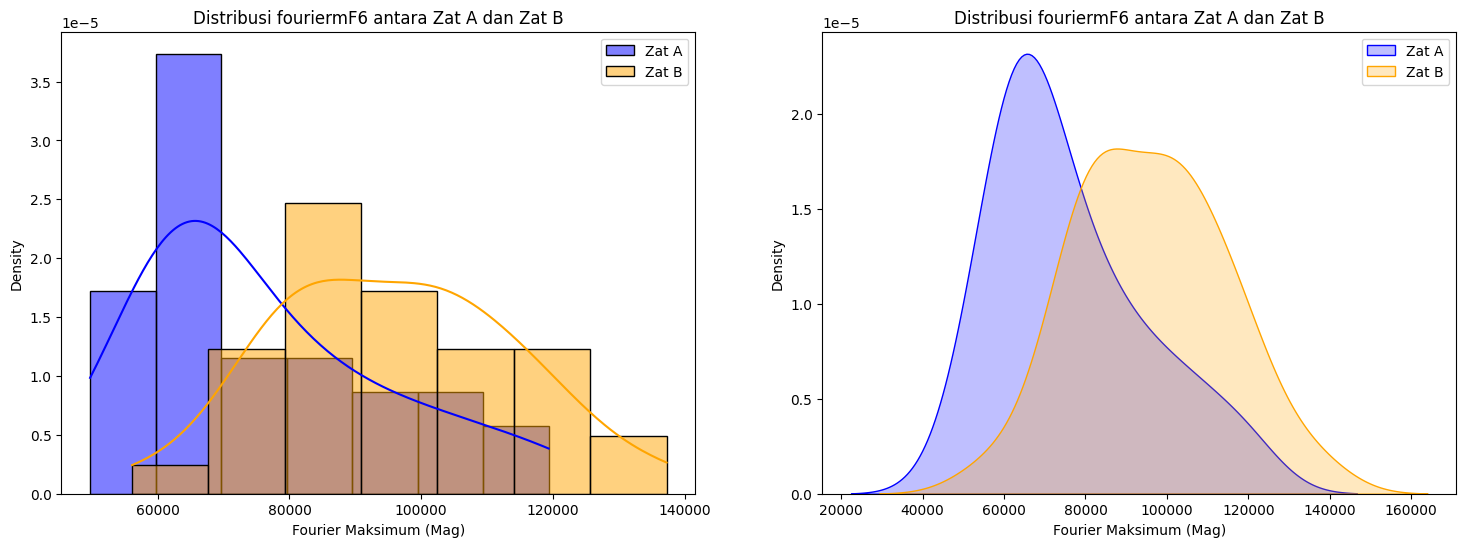

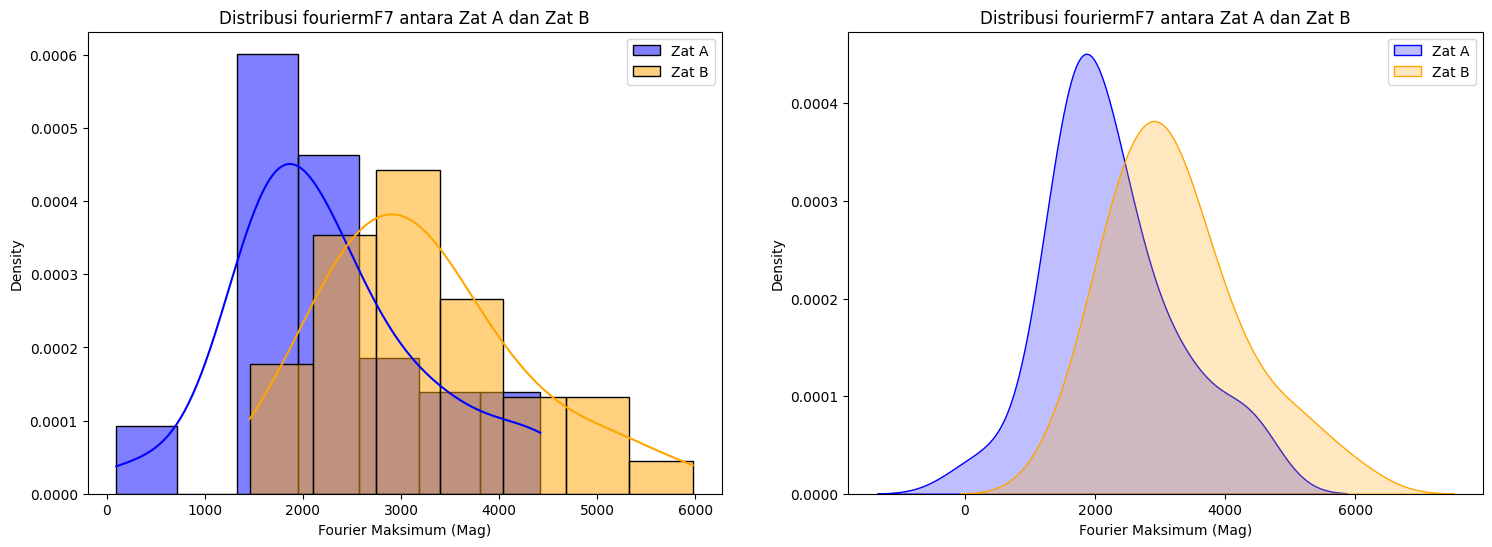

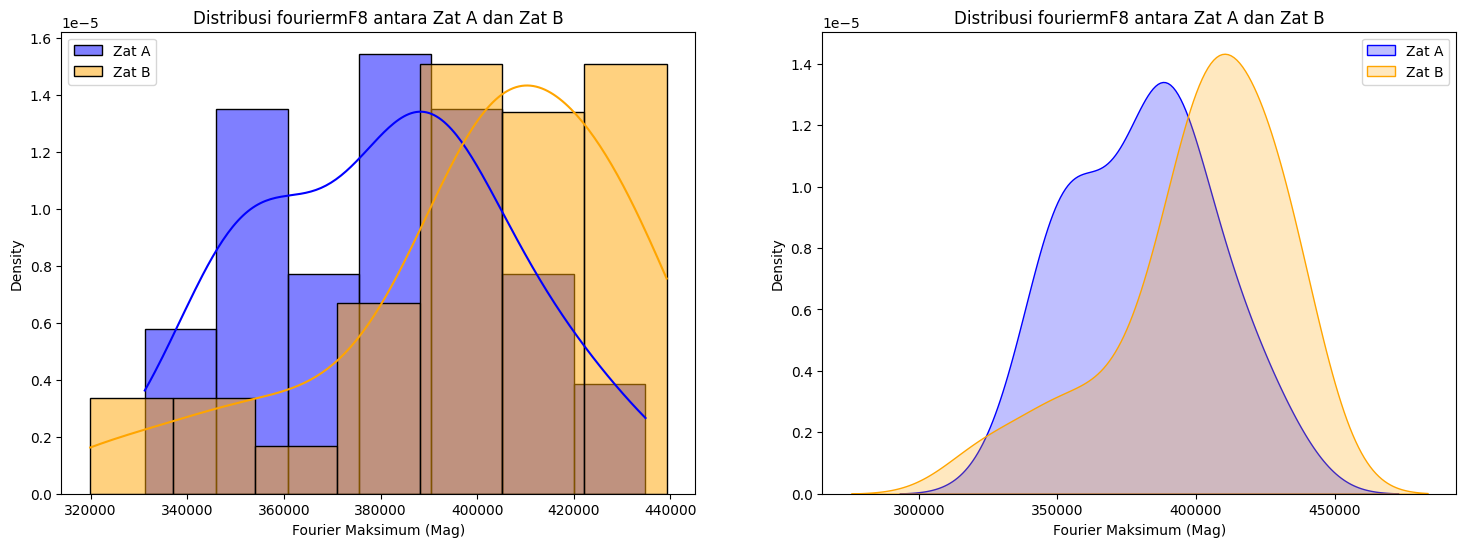

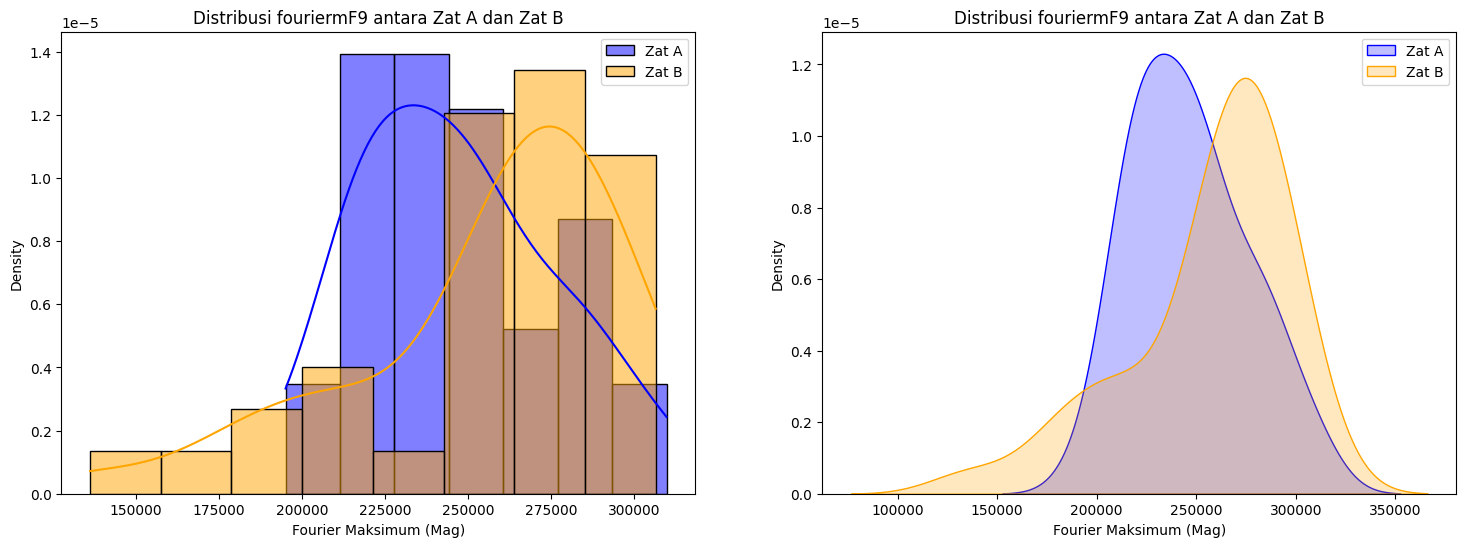

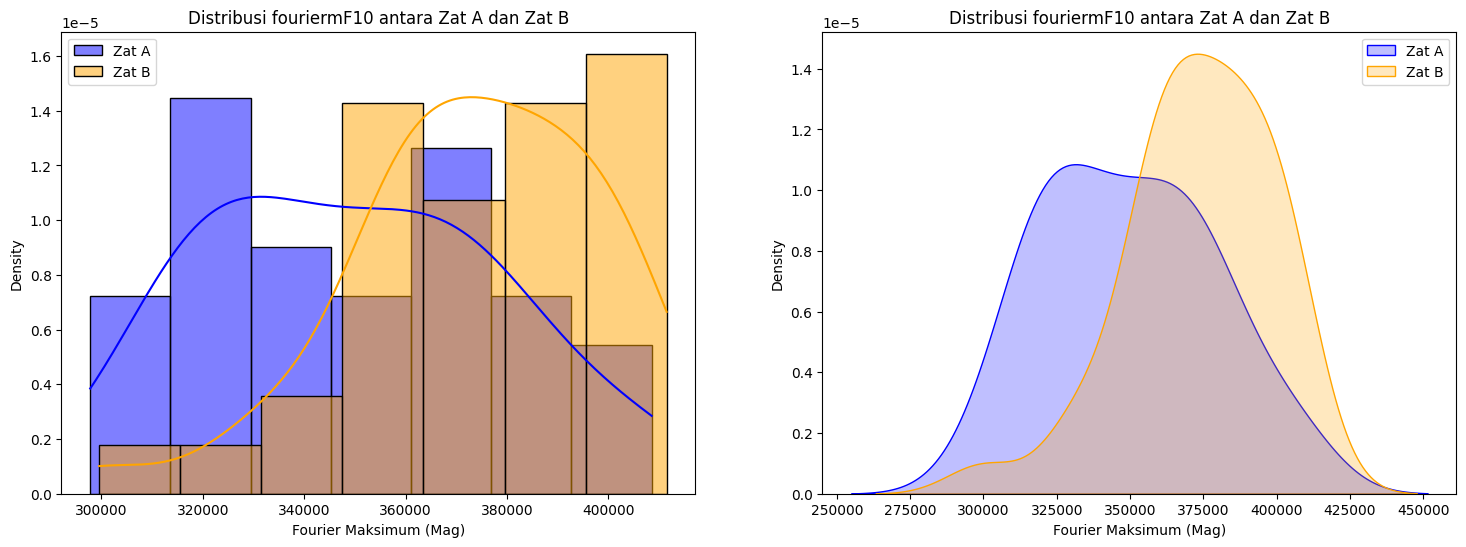

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

zat_A_fourier = dataFourier_max[dataFourier_max['label'] == 'A']
zat_B_fourier = dataFourier_max[dataFourier_max['label'] == 'B']

kolom_to_plot = dataFourier_max.columns[:-1]  # Exclude kolom label

for kolom in kolom_to_plot:
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(zat_A_fourier[kolom], label='Zat A', kde=True, color='blue', stat='density')
    sns.histplot(zat_B_fourier[kolom], label='Zat B', kde=True, color='orange', stat='density')
    plt.title(f'Distribusi {kolom} antara Zat A dan Zat B')
    plt.xlabel('Fourier Maksimum (Mag)')
    plt.ylabel('Density')
    plt.legend()

    # Plot kedua
    plt.subplot(1, 2, 2)
    sns.kdeplot(zat_A_fourier[kolom], label='Zat A', color='blue', fill='True')
    sns.kdeplot(zat_B_fourier[kolom], label='Zat B', color='orange', fill='True')
    plt.title(f'Distribusi {kolom} antara Zat A dan Zat B')
    plt.xlabel('Fourier Maksimum (Mag)')
    plt.ylabel('Density')
    plt.legend()

    plt.show()


In [32]:
import pandas as pd
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt# Lakukan uji Kolmogorov-Smirnov untuk setiap kolom
zat_A_fourier = dataFourier_max[dataFourier_max['label'] == 'A']
zat_B_fourier = dataFourier_max[dataFourier_max['label'] == 'B']
for kolom in dataFourier_max.columns[:-1]:  # Exclude kolom label
    statistic, p_value = ks_2samp(zat_A_fourier[kolom], zat_B_fourier[kolom])

    print(f"Uji Kolmogorov-Smirnov untuk {kolom}:")
    print(f"  Statistik Uji KS: {statistic}")
    print(f"  Nilai p: {p_value}")

    if p_value < 0.05:
        print("  Hipotesis nol ditolak. Ada perbedaan signifikan antara distribusi.")
    else:
        print("  Hipotesis diterima. Ada perbedaan signifikan antara distribusi.")
    print("\n")

Uji Kolmogorov-Smirnov untuk fouriermF1:
  Statistik Uji KS: 0.5142857142857142
  Nilai p: 0.00014044378179541567
  Hipotesis nol ditolak. Ada perbedaan signifikan antara distribusi.


Uji Kolmogorov-Smirnov untuk fouriermF2:
  Statistik Uji KS: 0.5428571428571428
  Nilai p: 4.421378315781605e-05
  Hipotesis nol ditolak. Ada perbedaan signifikan antara distribusi.


Uji Kolmogorov-Smirnov untuk fouriermF3:
  Statistik Uji KS: 0.4857142857142857
  Nilai p: 0.00041352891306427824
  Hipotesis nol ditolak. Ada perbedaan signifikan antara distribusi.


Uji Kolmogorov-Smirnov untuk fouriermF4:
  Statistik Uji KS: 0.4
  Nilai p: 0.0068714202633811654
  Hipotesis nol ditolak. Ada perbedaan signifikan antara distribusi.


Uji Kolmogorov-Smirnov untuk fouriermF5:
  Statistik Uji KS: 0.5428571428571428
  Nilai p: 4.421378315781605e-05
  Hipotesis nol ditolak. Ada perbedaan signifikan antara distribusi.


Uji Kolmogorov-Smirnov untuk fouriermF6:
  Statistik Uji KS: 0.5142857142857142
  Nilai p: 0.

In [33]:
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt# Lakukan uji Kolmogorov-Smirnov untuk setiap kolom
zat_A_fourier = dataFourier_max[dataFourier_max['label'] == 'A']
zat_B_fourier = dataFourier_max[dataFourier_max['label'] == 'B']

ks_table_data = []

for kolom in dataFourier_max.columns[:-1]:
    statistic, p_value = ks_2samp(zat_A_fourier[kolom], zat_B_fourier[kolom])

    label = f"{kolom} (A vs B)"
    ks_table_data.append([label, statistic, p_value])

ks_table_data_with_pvalue = []

for row in ks_table_data:
    label, statistic, p_value = row
    significance = "Tolak" if p_value < 0.05 else "Terima"
    ks_table_data_with_pvalue.append([label, statistic, p_value, significance])

ks_table_headers = ["Label", "Statistik Uji KS", "Nilai p", "Signifikansi"]
ks_table = tabulate(ks_table_data_with_pvalue, headers=ks_table_headers, tablefmt="grid")

print("\nTabel Uji Kolmogorov-Smirnov:")
print(ks_table)


Tabel Uji Kolmogorov-Smirnov:
+----------------------+--------------------+-------------+----------------+
| Label                |   Statistik Uji KS |     Nilai p | Signifikansi   |
+======================+====================+=============+================+
| fouriermF1 (A vs B)  |           0.514286 | 0.000140444 | Tolak          |
+----------------------+--------------------+-------------+----------------+
| fouriermF2 (A vs B)  |           0.542857 | 4.42138e-05 | Tolak          |
+----------------------+--------------------+-------------+----------------+
| fouriermF3 (A vs B)  |           0.485714 | 0.000413529 | Tolak          |
+----------------------+--------------------+-------------+----------------+
| fouriermF4 (A vs B)  |           0.4      | 0.00687142  | Tolak          |
+----------------------+--------------------+-------------+----------------+
| fouriermF5 (A vs B)  |           0.542857 | 4.42138e-05 | Tolak          |
+----------------------+--------------------+

Accuracy: 0.57

Classification Report:
              precision    recall  f1-score   support

           A       1.00      0.40      0.57        10
           B       0.40      1.00      0.57         4

    accuracy                           0.57        14
   macro avg       0.70      0.70      0.57        14
weighted avg       0.83      0.57      0.57        14


Confusion Matrix:
[[4 6]
 [0 4]]


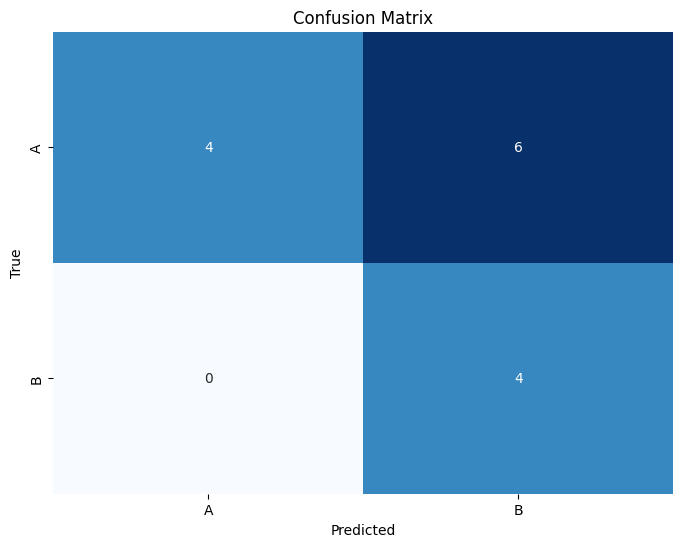

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = dataFourier_max.drop('label', axis=1)
y = dataFourier_max['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', C=1.0, random_state=42)

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_rep)
print('\nConfusion Matrix:')
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Analisis Narasi
Uji Kolmogorov-Smirnov (KS-Test) adalah uji statistik non-parametrik yang digunakan untuk menguji kesamaan atau kesesuaian distribusi empiris dari suatu sampel data dengan distribusi teoritis tertentu atau dengan distribusi empiris dari sampel lain. Uji Kolmogorov-Smirnov sensitif terhadap perbedaan di seluruh distribusi, sehingga dapat mendeteksi perbedaan dalam bentuk distribusi atau pergeseran keseluruhan. Uji ini dapat digunakan untuk menguji apakah kedua sampel data berasal dari distribusi tertentu, seperti persoalan ini, dalam FFT. Sama halnya dengan gradien maksimum, didapatkan keseluruhan hasil menunjukkan hipotesis nol ditolak, ada perbedaan signifikan antara distribusi. Artinya ada perbedaan antara zat A dan zat B.

Melanjutkan hal ini, seperti gradien maksimum maka saya berinisiatif melakukan tes lanjutkan seberapa jauh perbedaan itu (akurasinya) melalui Support Vector Machine (SVM). Menurut kajian literatur, Support Vector Machine (SVM) adalah algoritma pembelajaran mesin yang digunakan untuk tugas klasifikasi dan regresi. SVM bekerja dengan mencari hyperplane (bidang pemisah) optimal yang memisahkan dua kelas dalam ruang fitur. Dengan kata lain, SVM mencoba menemukan batas akurasi, presisi, dan lain-lain untuk memisahkan dua kelas dalam ruang fitur. Dari hasil, zat A dan B memiliki akurasi 57%, atau terbedakan sebesar 43%, ini mengindikasikan bahwa ada faktor-faktor lain yang mempengaruhi zat A dan zat B berdasarkan gradien maksimum yang diketahui.

Pendapat saya perbedaan ini dihasilkan oleh sudah pasti karena perbedaan zat, kemudian parameter yang ditentukan peneliti yang mengambil suatu data sensor ini. Entah itu temperatur, posisi, kecepatan, dan lain-lain.

Dibanding fitur gradien max, pada fitur fourier data berhasil terbedakan secara lebih jelas.